In [74]:
import os 

import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# sns.set()
sns.set(style="ticks", context="talk")

from scipy import signal
from scipy.io import wavfile
import wave
import struct

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [75]:
two_up =  os.path.abspath(os.path.join('.' ,"../.."))
print("Project root path is: ", two_up)

dataDirName = "data"
rawDataDirName = "test_data"
className = "simple_sine"
data_path = os.path.join(two_up, dataDirName, rawDataDirName, className)

Project root path is:  D:\Programming\AudioMining


In [76]:
# frequency is the number of times a wave repeats a second
frequency = 1000
num_samples = 48000
 
# The sampling rate of the analog to digital convert
sampling_rate = 48000
amplitude = 12000

# generate sine wave
s_wave = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples)]


In [77]:
# Generate second signal 
frequency = 2000
num_samples2 = 24000
 
# The sampling rate of the analog to digital convert
sampling_rate = 48000

# generate sine wave
s_wave2 = [np.sin(2 * np.pi * frequency * x/sampling_rate) for x in range(num_samples2)]


In [78]:
# pad with 0 
signal2 = [0 for x in range(num_samples2)] + s_wave2

# overlap signals
mixed_signal = np.add(np.asarray(s_wave), np.asarray(signal2))

In [79]:
# Get fast fourier transform
data = np.array(mixed_signal)
data_fft = np.fft.fft(data)

# This will give us the frequency we want
frequencies = np.abs(data_fft)

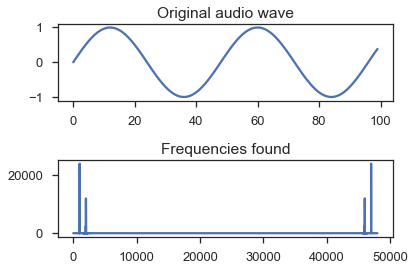

In [80]:
# Plot part of signal and fft

plt.subplot(2,1,1)
plt.plot(data[:100])
plt.title("Original audio wave")
plt.subplot(2,1,2)
plt.plot(frequencies)
plt.title("Frequencies found")
# plt.xlim(0,3000)
plt.tight_layout(pad=1.0)
plt.show()

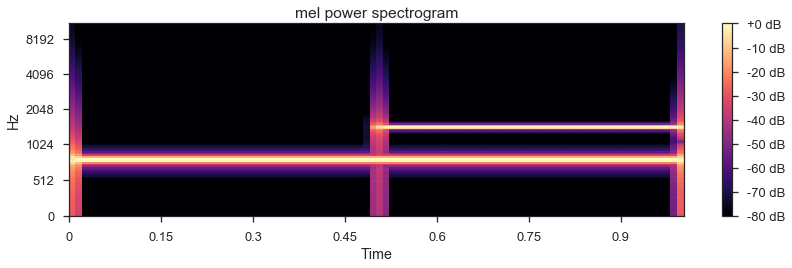

In [81]:
S = librosa.feature.melspectrogram(mixed_signal, sr=sampling_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sampling_rate, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

In [82]:
IPython.display.Audio(mixed_signal, rate=sampling_rate)

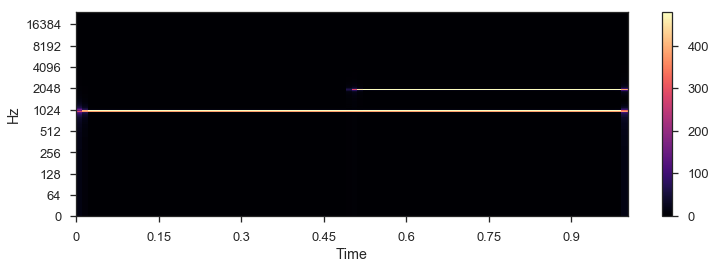

In [94]:
n_fft = 2048
stft = np.abs(librosa.stft(data, n_fft=n_fft))

plt.figure(figsize=(11,4))

librosa.display.specshow(stft, x_axis='time', y_axis='log', sr=sampling_rate)

# draw a color bar
plt.colorbar()
plt.tight_layout()

In [84]:
sampling_rateb


NameError: name 'sampling_rateb' is not defined

In [85]:
# test saving 
nframes=num_samples 
comptype="NONE"
compname="not compressed" 
nchannels=1
sampwidth=2
filename = "samplingrate_save.wav"

wav_file = wave.open(os.path.join(data_path, filename), 'w')
wav_file.setparams((nchannels, sampwidth, int(sampling_rate), nframes, comptype, compname))

for s in mixed_signal:
   wav_file.writeframes(struct.pack('h', int(s*amplitude)))

In [90]:
s_data, s_sr =  librosa.load(os.path.join(data_path, filename), sr=sampling_rate)

48000